In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
def get_results(data_dir):
    data_dict = {}
    for item in os.listdir(data_dir):
        full_path = os.path.join(data_dir, item)
        if os.path.isdir(full_path):
            name = os.path.basename(full_path)
            # print(full_path)
            progress_path = os.path.join(full_path, name + "_s0", "progress.txt")
            # print(progress_path)
            # print()
            df = pd.read_csv(progress_path, sep="\t")

            data_dict[str(name)] = df
            
    return data_dict

In [3]:
def plot_colum(colum, df_dict, ylabel, figsize=(5,5), fs=12, loc="best", xlabel="Epochs"):
    
    matplotlib.rcParams.update({'font.size': fs})  # set font size
    
    f, ax = plt.subplots(1,1, figsize=figsize)
    
    pretty_name = {
        "ppo_walker": "PPO",
        "ppo_walker_hc": "PPO HC",
        "sac_auto_500_ez": "SAC",
        "sac_auto_500_hc": "SAC HC",
        "td3_ez": "TD3",
        "td3_hc": "TD3 HC"
    }
    
    handles = []
    labels = []
    
    sorted_keys = sorted(list(df_dict.keys()))

    for sac_run in sorted_keys:
        if "ppo" in sac_run:
            ax.plot(df_dict[sac_run][colum], label=pretty_name[sac_run], ls="--")
        elif "td3" in sac_run:
            ax.plot(df_dict[sac_run][colum], label=pretty_name[sac_run], ls=":")
        else:
            ax.plot(df_dict[sac_run][colum], label=pretty_name[sac_run])
        
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

    # use the ordered legend entries to manually generate the legend
    plt.legend(loc=loc)

    # plt.legend()
    plt.show()

In [4]:
new_data = get_results("/Users/finn/Desktop/sac_data/final_data")

In [5]:
new_data.keys()

dict_keys(['sac_auto_500_hc', 'td3_ez', 'ppo_walker_hc', 'ppo_walker', 'td3_hc', 'sac_auto_500_ez'])

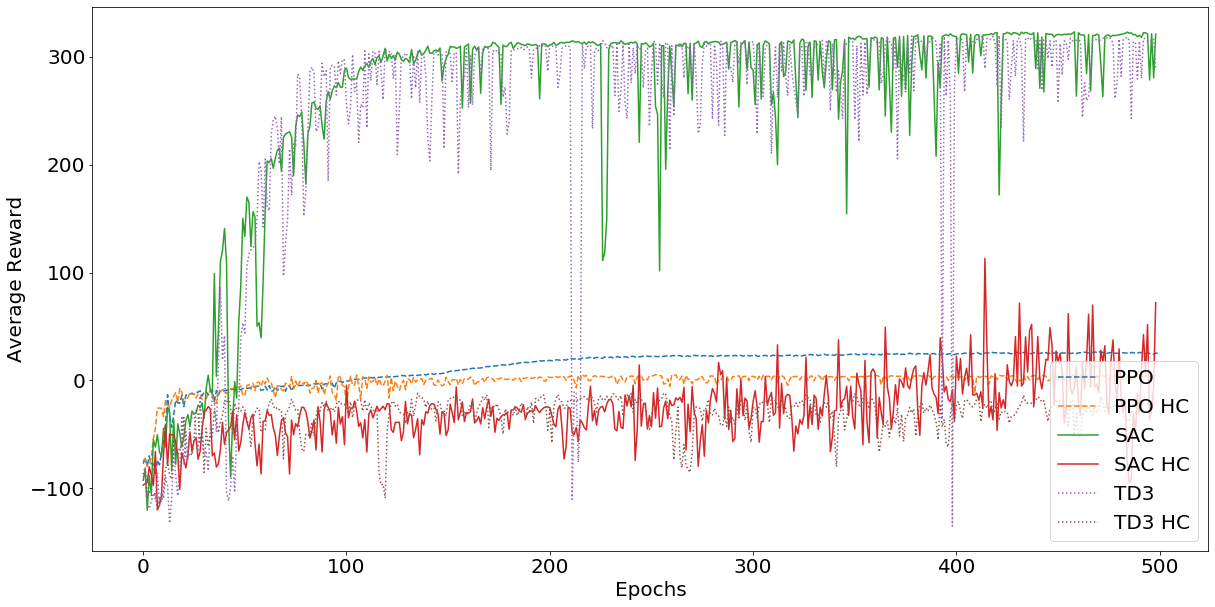

In [6]:
plot_colum("AverageEpRet", new_data, ylabel="Average Reward", figsize=(20,10), fs=20, loc='lower right')

In [7]:
def get_test_results(data_dir):
    data_dict = {}
    for item in os.listdir(data_dir):
        if "log.txt" in item:
            full_path = os.path.join(data_dir, item)
            print(full_path)
            name = item.split(".")[0][:-4]
            # print(name)
            
            data_dict[name] = {}
            
            episode_rewards = []
            episode_lens = []
            with open(full_path, "r") as f:
                for line in f:
                    if "Episode" in line:
                        # print(line.split(" "))
                        ep_ret = line.split(" ")[4]
                        ep_len = line.split(" ")[-1][:-1]
                        
                        episode_rewards.append(float(ep_ret))
                        episode_lens.append(int(ep_len))
                        
                        # print(ep_ret)
                        # print(ep_len)
            #progress_path = os.path.join(full_path, name + "_s0", "progress.txt")
            # print(progress_path)
            # print()
            # df = pd.read_csv(progress_path, sep="\t")
            
            data_dict[name]["rewards"] = episode_rewards
            data_dict[name]["lens"] = episode_lens
            
            # data_dict[str(name)] = df
            
    return data_dict

In [8]:
test_data = get_test_results("/Users/finn/Desktop/sac_data/final_data")

/Users/finn/Desktop/sac_data/final_data/500_hc_on_hc_log.txt
/Users/finn/Desktop/sac_data/final_data/500_ez_on_ez_log.txt
/Users/finn/Desktop/sac_data/final_data/500_hc_on_ez_log.txt
/Users/finn/Desktop/sac_data/final_data/500_ez_on_hc_log.txt


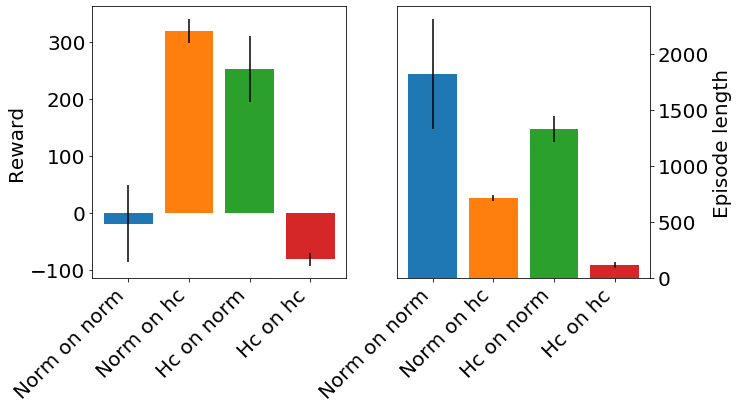

In [10]:
f, axs = plt.subplots(1, 2, figsize=(10, 5))
for ind, run in enumerate(test_data):
    reward_mean = np.mean(test_data[run]["rewards"])
    reward_std = np.std(test_data[run]["rewards"])
    
    len_mean = np.mean(test_data[run]["lens"])
    len_std = np.std(test_data[run]["lens"])    
    
    axs[0].bar(ind, reward_mean, yerr=reward_std, label=run)
    axs[1].bar(ind, len_mean, yerr=len_std, label=run)


axs[0].set_ylabel('Reward')
# plt.title('Reward obtained by on different environments')
# axs[0].set_xticklabels(list(test_data.keys()))
# axs[0].set_xticklabels(np.arange(0, len(list(test_data.keys()))), list(test_data.keys()))
# axs[0].set_xticklabels([0, 1, 2, 3], ["Norm on norm", "Norm on hc", "Hc on norm", "Hc on hc"])

axs[1].yaxis.tick_right()
axs[1].set_ylabel("Episode length")
axs[1].yaxis.set_label_position("right")
# axs[1].set_xtick(list(test_data.keys()))

#for l in axs[0].get_xticklabels():
#    print(l)


# plt.suptitle("Reward and episode length obtained in different environments")
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45, ha="right")
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45, ha="right")
plt.setp(axs[0], xticks=[y for y in range(len(list(test_data.keys())))],
         xticklabels=['Norm on norm', 'Norm on hc', 'Hc on norm', 'Hc on hc'])

plt.setp(axs[1], xticks=[y for y in range(len(list(test_data.keys())))],
         xticklabels=['Norm on norm', 'Norm on hc', 'Hc on norm', 'Hc on hc'])
# plt.legend()
plt.show()


In [65]:
data = []
pretty_labels = {
    "500_hc_on_hc": "HC on HC",
    "500_hc_on_ez": "HC on norm",
    "500_ez_on_hc": "Norm on HC",
    "500_ez_on_ez": "Norm on norm"
}

# make a dataframe from np data...
for test_run in sorted(list(test_data.keys())):
    for ind in range(500):
        data.append([test_data[test_run]["rewards"][ind], test_data[test_run]["lens"][ind], pretty_labels[test_run]])
    
    
df = pd.DataFrame(data, columns=["Reward", "Episode length", "Run"])

In [66]:
df

,Reward,Episode length,Run
0,320.566,716,Norm on norm
1,319.722,715,Norm on norm
2,320.697,710,Norm on norm
3,320.404,713,Norm on norm
4,321.334,711,Norm on norm
...,...,...,...
1995,8.163,2000,HC on HC
1996,-6.221,2000,HC on HC
1997,14.617,956,HC on HC
1998,68.882,2000,HC on HC


In [112]:
def plot_test_data(plot_kind, df=df):
    
    sns.set_context("paper", rc={
        "font.size":20, 
        "axes.titlesize":20,
        "axes.labelsize":20, 
        "xtick.labelsize":16, 
        "ytick.labelsize":16})  

    f, axs = plt.subplots(1, 2, figsize=(20, 10))
    for ind, y in enumerate(["Reward", "Episode length"]):
        plot_kind(x="Run", y=y, data=df, ax=axs[ind], palette="colorblind")
    
    axs[0].set_xlabel("")  # don't want it to say anything below the tick labels...
    axs[1].set_xlabel("")
    
    plt.show()

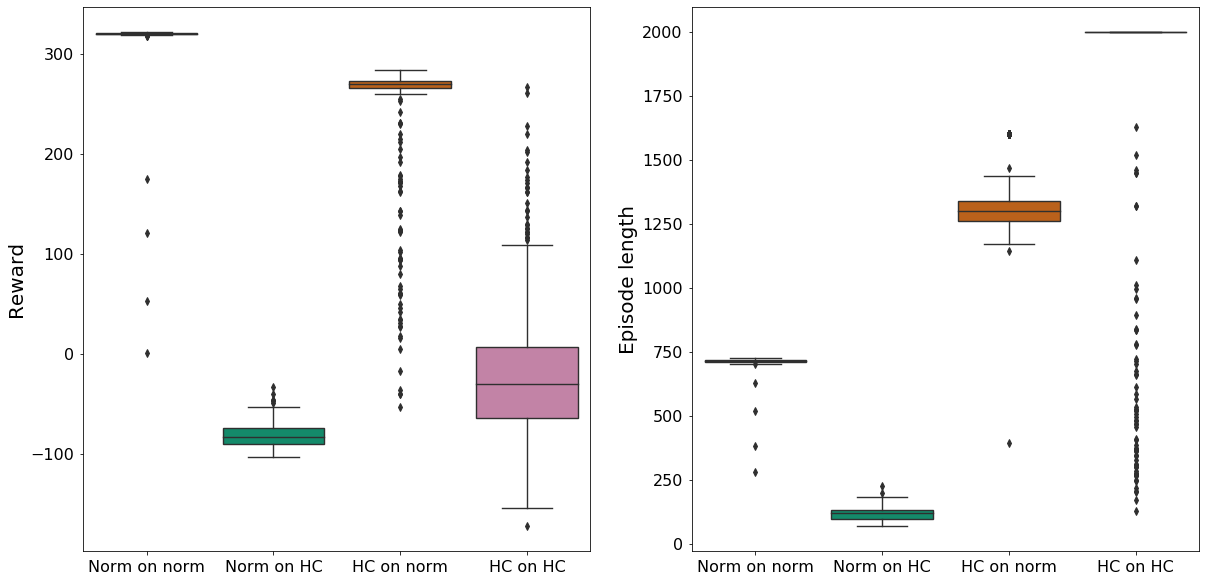

In [113]:
sns.color_palette("cubehelix")
plot_test_data(sns.boxplot)

In [104]:
def dualplot_test_data(first_plot, second_plot, df=df):
    
    sns.set_context("paper", rc={
        "font.size":20, 
        "axes.titlesize":20,
        "axes.labelsize":20, 
        "xtick.labelsize":16, 
        "ytick.labelsize":16})  

    f, axs = plt.subplots(1, 2, figsize=(20, 10))
    for ind, y in enumerate(["Reward", "Episode length"]):
        first_plot(x="Run", y=y, data=df, ax=axs[ind])
        second_plot(x="Run", y=y, data=df, ax=axs[ind], color="lightgray")

    
    axs[0].set_xlabel("")  # don't want it to say anything below the tick labels...
    axs[1].set_xlabel("")
    
    plt.show()

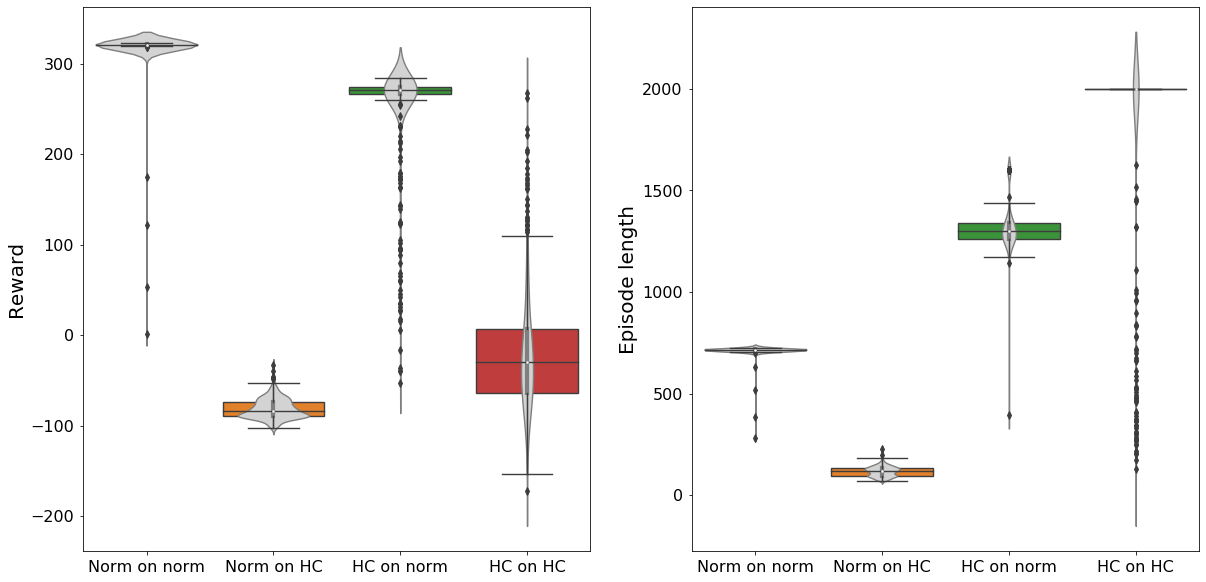

In [106]:
dualplot_test_data(sns.boxplot, sns.violinplot)

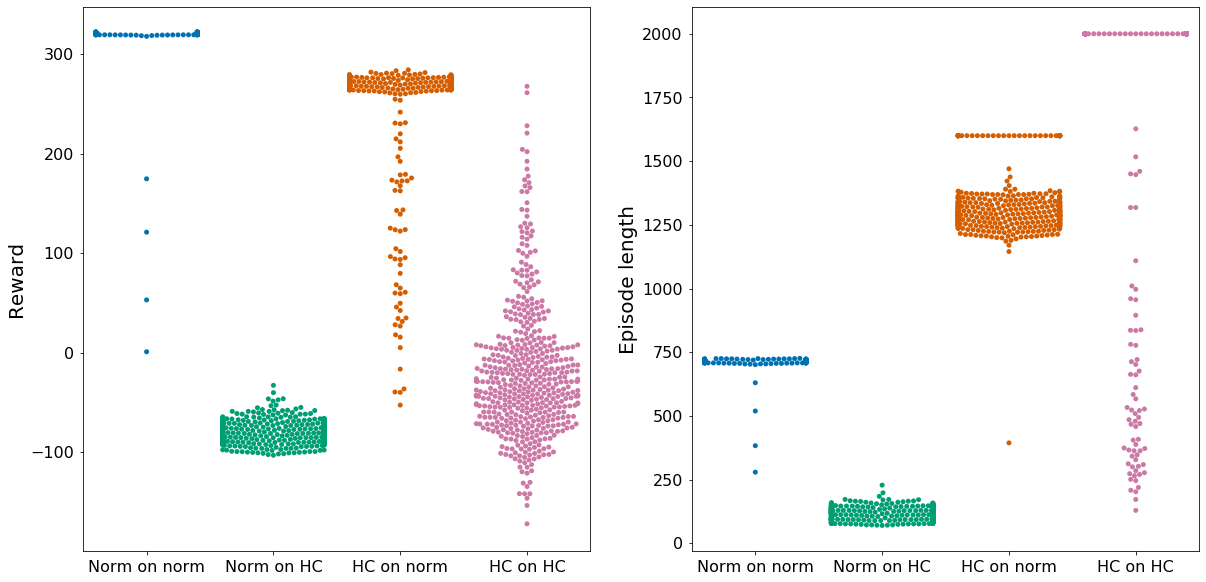

In [114]:
plot_test_data(sns.swarmplot)

In [91]:
data = []
pretty_labels = {
    "500_hc_on_hc": "HC on HC",
    "500_hc_on_ez": "HC on norm",
    "500_ez_on_hc": "Norm on HC",
    "500_ez_on_ez": "Norm on norm"
}

# make a dataframe from np data...
for test_run in sorted(list(test_data.keys())):
    for ind in range(500):
        if ind % 5 == 0:  # take only every x-th value, swarmplots don't scale well to large n...
            data.append(
                [test_data[test_run]["rewards"][ind], 
                 test_data[test_run]["lens"][ind], 
                 pretty_labels[test_run]])
    
    
trimmed_df = pd.DataFrame(data, columns=["Reward", "Episode length", "Run"])

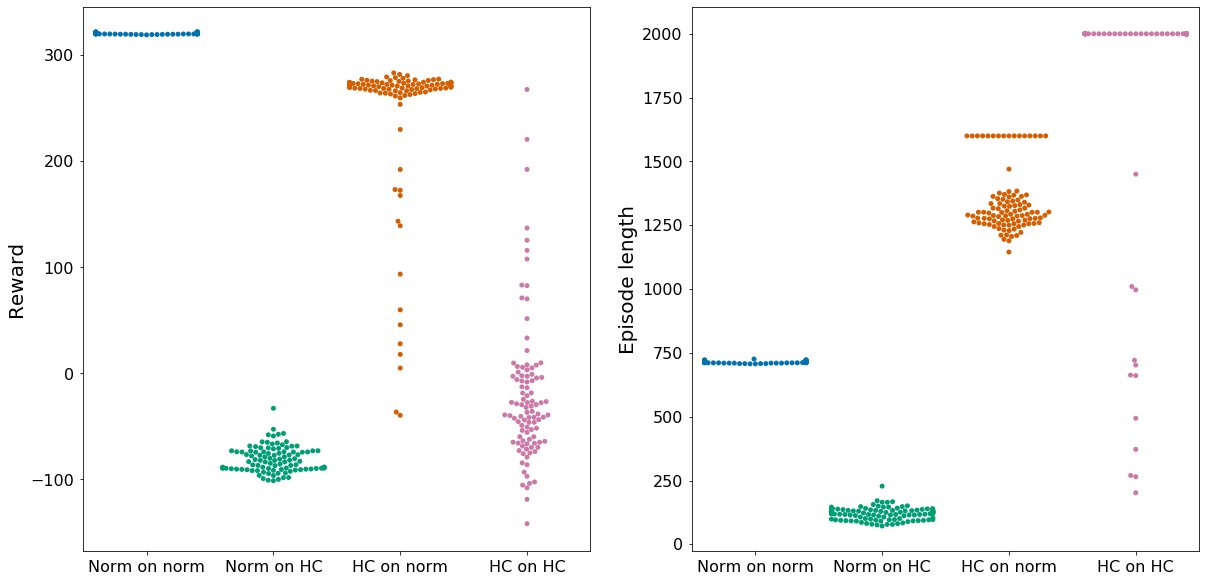

In [115]:
plot_test_data(sns.swarmplot, df=trimmed_df)

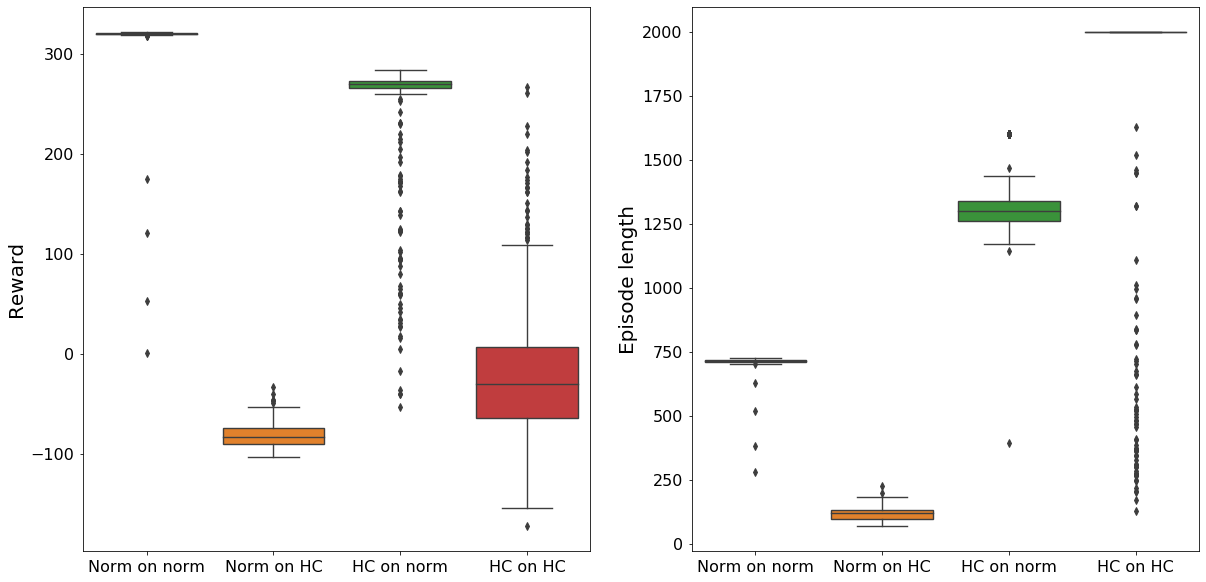

In [88]:
plot_test_data(sns.boxplot)

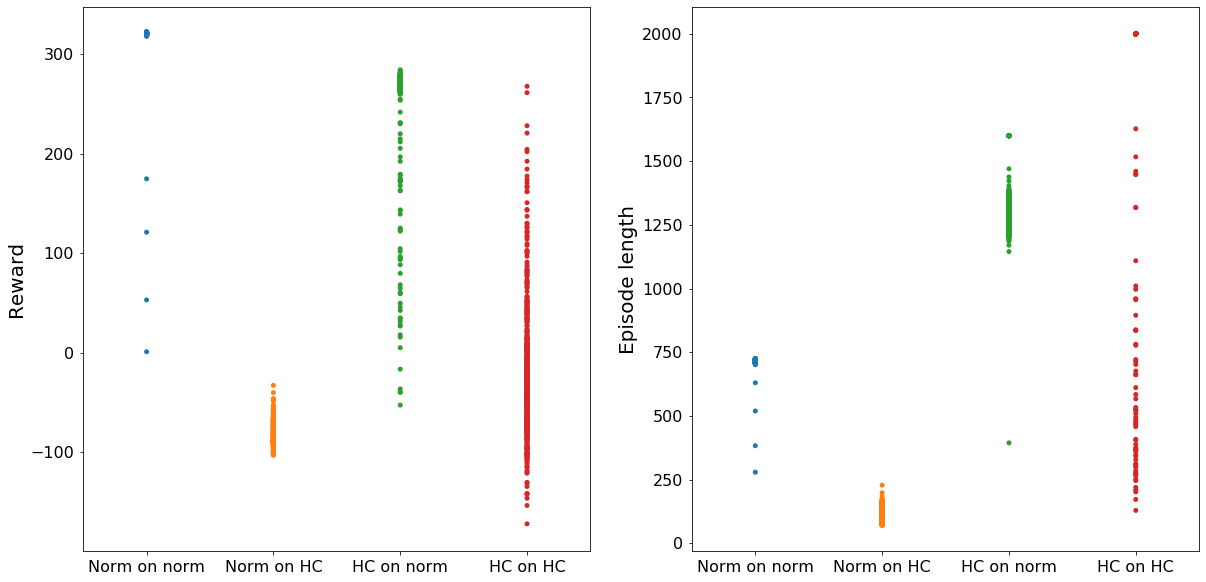

In [90]:
plot_test_data(sns.stripplot)

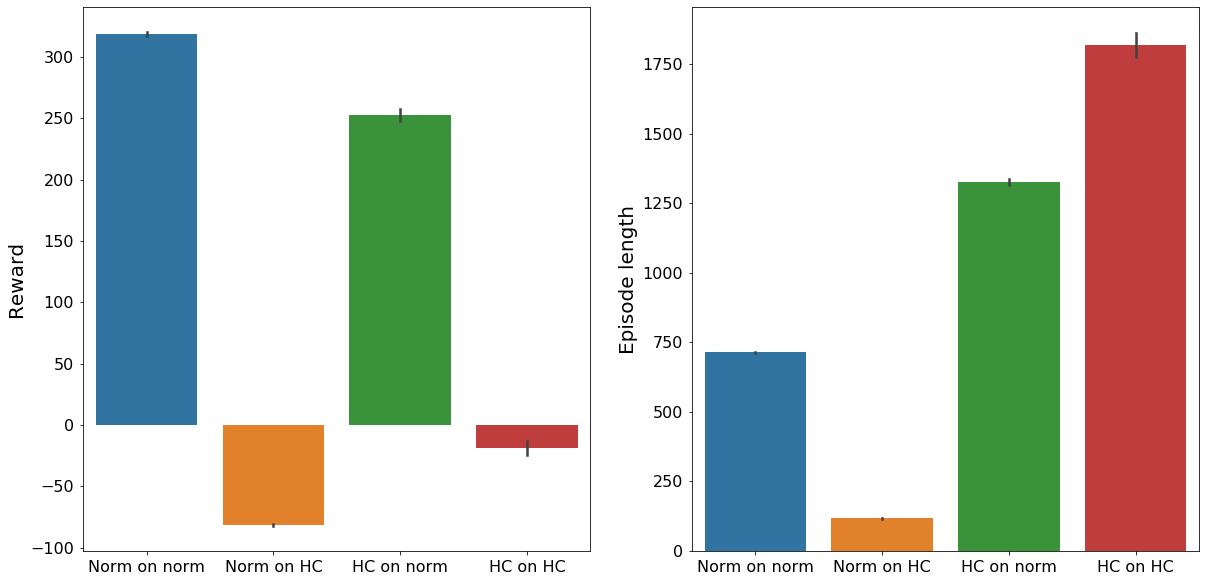

In [72]:
plot_test_data(sns.barplot)